<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALLING LIBRARIES**


In [1]:
#install library
!pip install google-search-results
!pip install squarify
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32019 sha256=1e3f7adf5b2803dcf65b55d3fb350cf893bc2aa8ca86a701209b1b939cd88971
  Stored in directory: /root/.cache/pip/wheels/68/8e/73/744b7d9d7ac618849d93081a20e1c0deccd2aef90901c9f5a9
Successfully built google-search-results
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [2]:
#import library needed for the search
from google.colab import drive 
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns
import re 
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')

Mounted at /content/drive


# **SCRIPT FOR THE SEARCHING OF THE JOBS**

In [23]:
#SerpApi google search
search_term="Data Scientist" #Job to be searching Analyst Scientist
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [24]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

<ipython-input-24-d668609e91a2>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [25]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,extensions,job_id,posted_at,schedule_type
0,Data Scientist,"Viasat, Inc.",Texas (+3 others),via Viasat Careers,About us\n\nOne team. Global challenges. Infin...,"[{'title': 'Qualifications', 'items': ['Master...","[{'link': 'http://www.viasat.com/', 'text': 'v...","[8 hours ago, Full-time, Health insurance]",eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCIsImh0aW...,8 hours ago,Full-time


In [26]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    0
related_links     0
extensions        0
job_id            0
posted_at         1
schedule_type     0
dtype: int64

In [27]:
jobs_df.shape #Shape of the DataFrame

(10, 11)

In [28]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  10 non-null     object
 6   related_links   10 non-null     object
 7   extensions      10 non-null     object
 8   job_id          10 non-null     object
 9   posted_at       9 non-null      object
 10  schedule_type   10 non-null     object
dtypes: object(11)
memory usage: 1008.0+ bytes


In [29]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [30]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [31]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [32]:
Ujobs

,items
0,[Master’s Degree and 3+ years of experience or...
1,[What you'll do...\n\nPosition: Data Scientist...
2,[For Senior Data Scientist II: bachelor’s degr...
3,[Individual must have extensive knowledge of S...
4,[Excellent verbal and written communication sk...
5,[3+ years working as a data scientist working ...
6,"[MSc/PhD in Statistics, Math, Operation Resear..."
7,[Analyze data using advanced analytics techniq...
8,[Demonstrates curiosity and a growth mindset; ...
9,[You have a shown foundation with technical br...


In [33]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

<ipython-input-33-544123ef4084>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:  
  if " R " in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

**# AVERAGE TIME**

In [35]:
#Extracting time and place to work

time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   

for i in jobs_df['extensions']:
  if "Contractor" in i:
    time.append("Contractor")

for i in jobs_df['extensions']:
  if "Internship" in i:
    time.append("Internship")         



In [36]:
import csv

new_data = jobs_df.values.tolist()

# Open the CSV file in write mode and write the new data to it
with open('/content/drive/MyDrive/Colab Notebooks/2023/Jobs.csv', 'a', newline='') as file:
    writer = csv.writer(file)

    # Write the new data to the file
    writer.writerows(new_data)

# **DATA MINED**

In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Jobs.csv', names =[
'title','company_name','location','via','description','job_highlights','related_links','extensions',
'job_id','thumbnail','posted_at','schedule_type','salary','work_from_home'])
df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,extensions,job_id,thumbnail,posted_at,schedule_type,salary,work_from_home
0,Senior Data Scientist,Walmart,"Bentonville, AR",via Walmart Careers,What you'll do...\n\nPosition: Senior Data Sci...,"[{'items': [""What you'll do...\n\nPosition: Se...","[{'link': 'https://www.walmart.com/', 'text': ...",https://encrypted-tbn0.gstatic.com/images?q=tb...,"['3 days ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBTY2llbnRpc3...,3 days ago,Full-time,NaN,NaN


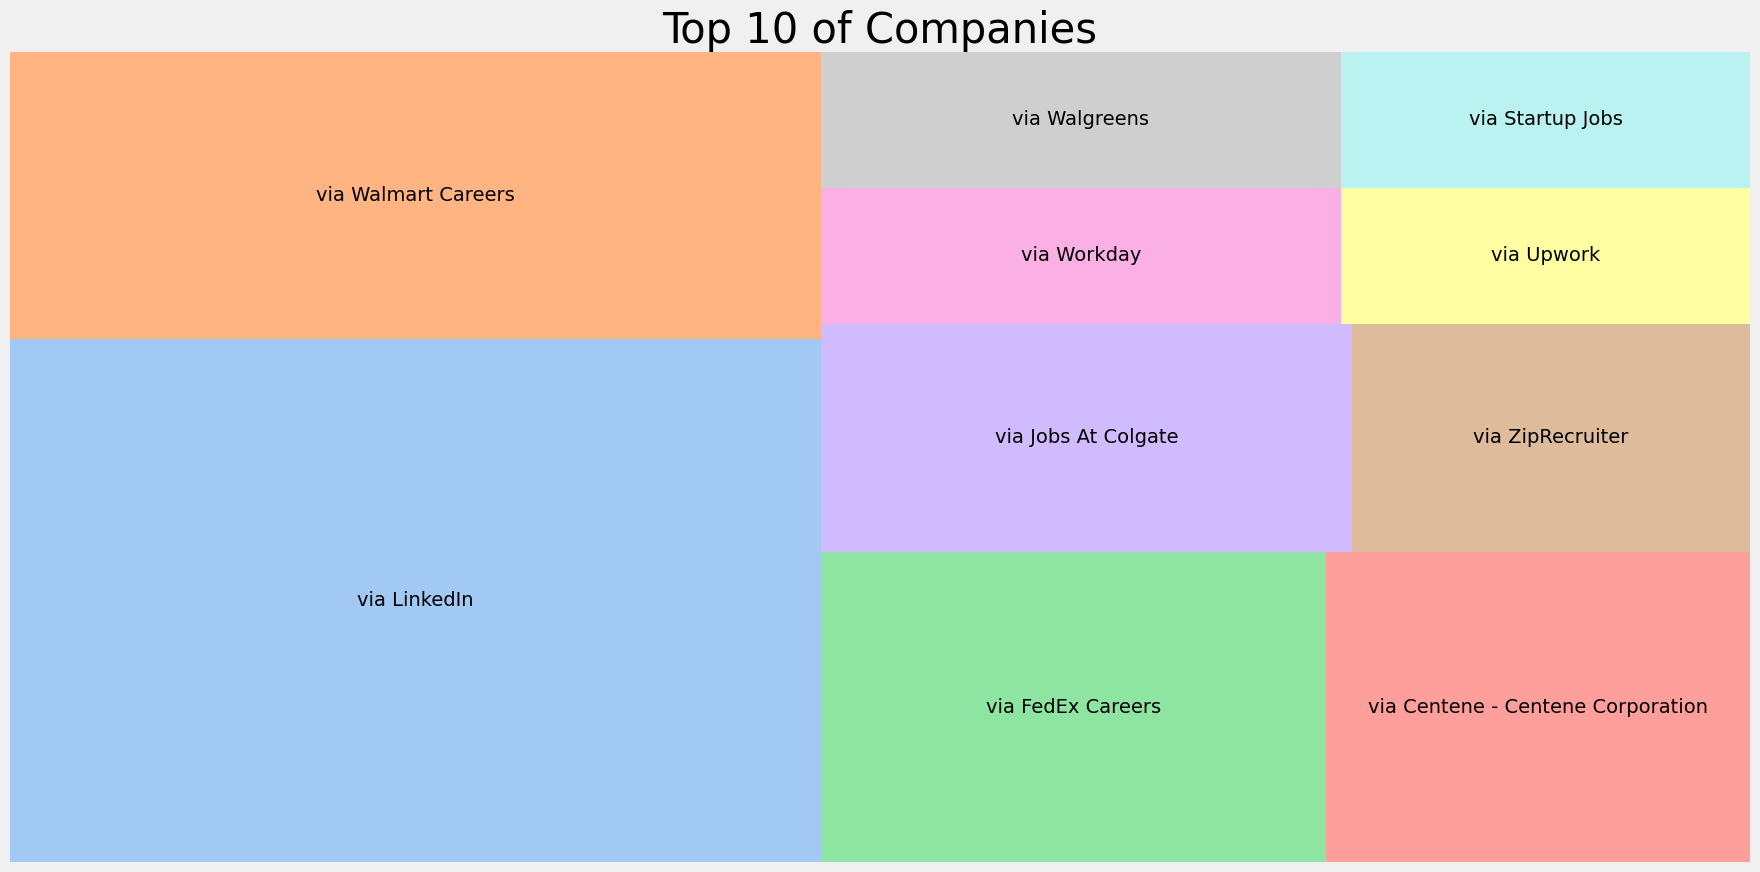

In [44]:
via = df.groupby(['via'])['via'].count().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(20,10))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("pastel"))
plt.title("Top 10 of Companies", fontsize=30)
plt.axis("off")
plt.xticks(rotation=45, fontsize=30)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/via.png')

In [45]:
df['posted_at'] = df['posted_at'].map({
       '3 days ago':'1-10 days', '10 hours ago':'< 1 day ', '6 days ago':'1-10 days','12 days ago':'11-20 days',
       '8 days ago':'1-10 days','1 day ago':'1-10 days', '7 days ago':'1-10 days', 'Contractor':'< 1 day ', 'Full-time':'< 1 day ',
       '2 days ago':'1-10 days', '22 hours ago':'< 1 day ', '20 hours ago':'< 1 day ', '21 hours ago':'< 1 day ',
       '4 days ago':'1-10 days', '18 hours ago':'< 1 day ', '13 days ago':'11-20 days', '9 days ago':'1-10 days',
       '16 hours ago':'< 1 day ', '14 hours ago':'< 1 day ', '11 hours ago':'< 1 day ', '5 days ago':'1-10 days',
       '19 hours ago':'< 1 day ', '10 days ago':'1-10 days', '14 days ago':'< 1 day ', '20 days ago':'11-20 days', 'nan':'< 1 day ',
       '23 hours ago':'< 1 day ', '13 hours ago':'< 1 day ', '16 days ago':'< 1 day ', '21 days ago':'< 1 day ',
       '6 hours ago':'< 1 day ', '4 hours ago':'< 1 day ', '5 hours ago':'< 1 day ', '2 hours ago':'< 1 day ',
       '22 days ago':'>20 days ', '17 days ago':'11-20 days', '15 hours ago':'< 1 day ', '23 days ago':'>20 days ',
       '9 hours ago':'< 1 day ', '26 days ago':'>20 days ', '7 hours ago':'< 1 day ', '27 days ago':'>20 days ',
       '28 days ago':'>20 days ', '24 hours ago':'< 1 day ', '29 days ago':'>20 days ', '11 days ago':'11-20 days',
       '30 days ago':'>20 days ', '24 days ago':'>20 days '})



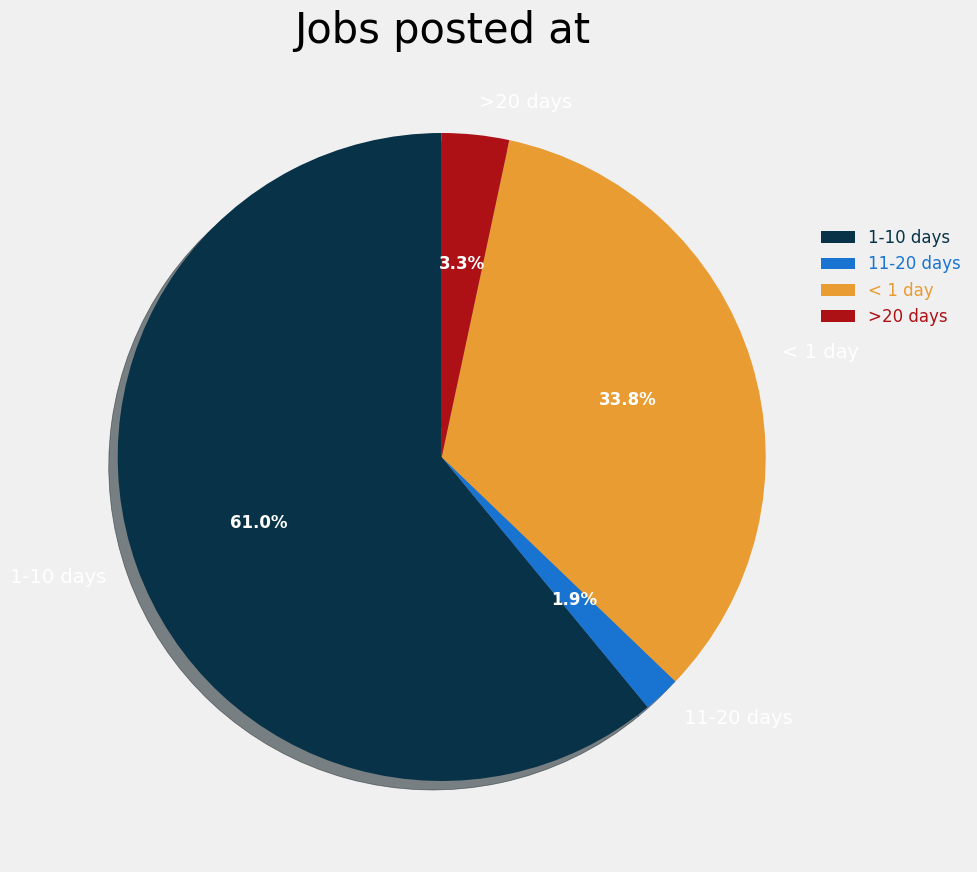

In [46]:
days = df.groupby(['posted_at'])['posted_at'].count()
colors = ['#083248', '#1974D1', '#E89C31','#AD1115']

plt.figure(figsize=(12,10))
_, _, autotexts = plt.pie(x=days.values, labels=days.index, autopct="%.1f%%", shadow=True, startangle=90, colors=colors, textprops={'color': "w"})

plt.legend(loc='best', labels=days.index, prop={'size': 12}, frameon=False, bbox_to_anchor=(0.95, 0.8), labelcolor=colors)
plt.setp(autotexts, size=12, weight='bold')
plt.title("Jobs posted at", fontsize=30)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/posted_at.png')

In [47]:
#STATES IN A NEW COLUMN

def search_words(text, words):
    # Split the text into words
    text_words = text.split()
    # Search for the specified words in the text
    found_words = [word for word in words if word in text_words]
    # Return the found words as a string
    return ', '.join(found_words)

# Define the words to search for
search_words_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL',
'IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE',
'NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC',
'SD','TN','TX','UT','VT','VA','VI','WA','WV','WI','WY']

# Apply the search_words function to the text column and save the results in a new column
df['states'] = df['location'].apply(lambda x: search_words(x, search_words_list))

In [48]:
!pip install -U kaleido
import plotly

figure = go.Figure(data=go.Choropleth(locations=df["states"],
                                      z = df.index,
                                      locationmode='USA-states',
                                      colorscale="viridis",
                                      colorbar_title="Q. Jobs"))
figure.update_layout(title="States where jobs was posted",geo_scope='usa')
plotly.offline.plot(figure,filename='/content/drive/MyDrive/Colab Notebooks/Charts Jobs/choro.html')
figure.write_image('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/choro.png')
figure.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#HARD SKILLS IN A NEW COLUMN


def search_words(text, words):
    # Split the text into words
    text_words = text.split()
    # Search for the specified words in the text
    found_words = [word for word in words if word in text_words]
    # Return the found words as a string
    return ' '.join(found_words)

# Define the words to search for
search_words_list = ['Python', 'SQL','Excel','BI','Tableau','AWS', 'Azure', 'ML','MATLAB','NoSQL', 'ETL','TensorFlow','PyTorch'
                     'Python;', 'SQL;','Excel;','BI;','Tableau;', 'R;','AWS;', 'Azure;', 'ML;','MATLAB;','NoSQL;', 'ETL;','TensorFlow;','PyTorch;'
                     'Python,', 'SQL,','Excel,','BI,','Tableau,', 'R,','AWS,', 'Azure,', 'ML,','MATLAB,','NoSQL,', 'ETL,','TensorFlow,','PyTorch,']

# Apply the search_words function to the text column and save the results in a new column
df['hardskills'] = df['description'].apply(lambda x: search_words(x, search_words_list))
df['hardskills'] = df['hardskills'].str.replace(',', '').str.replace(';', '')

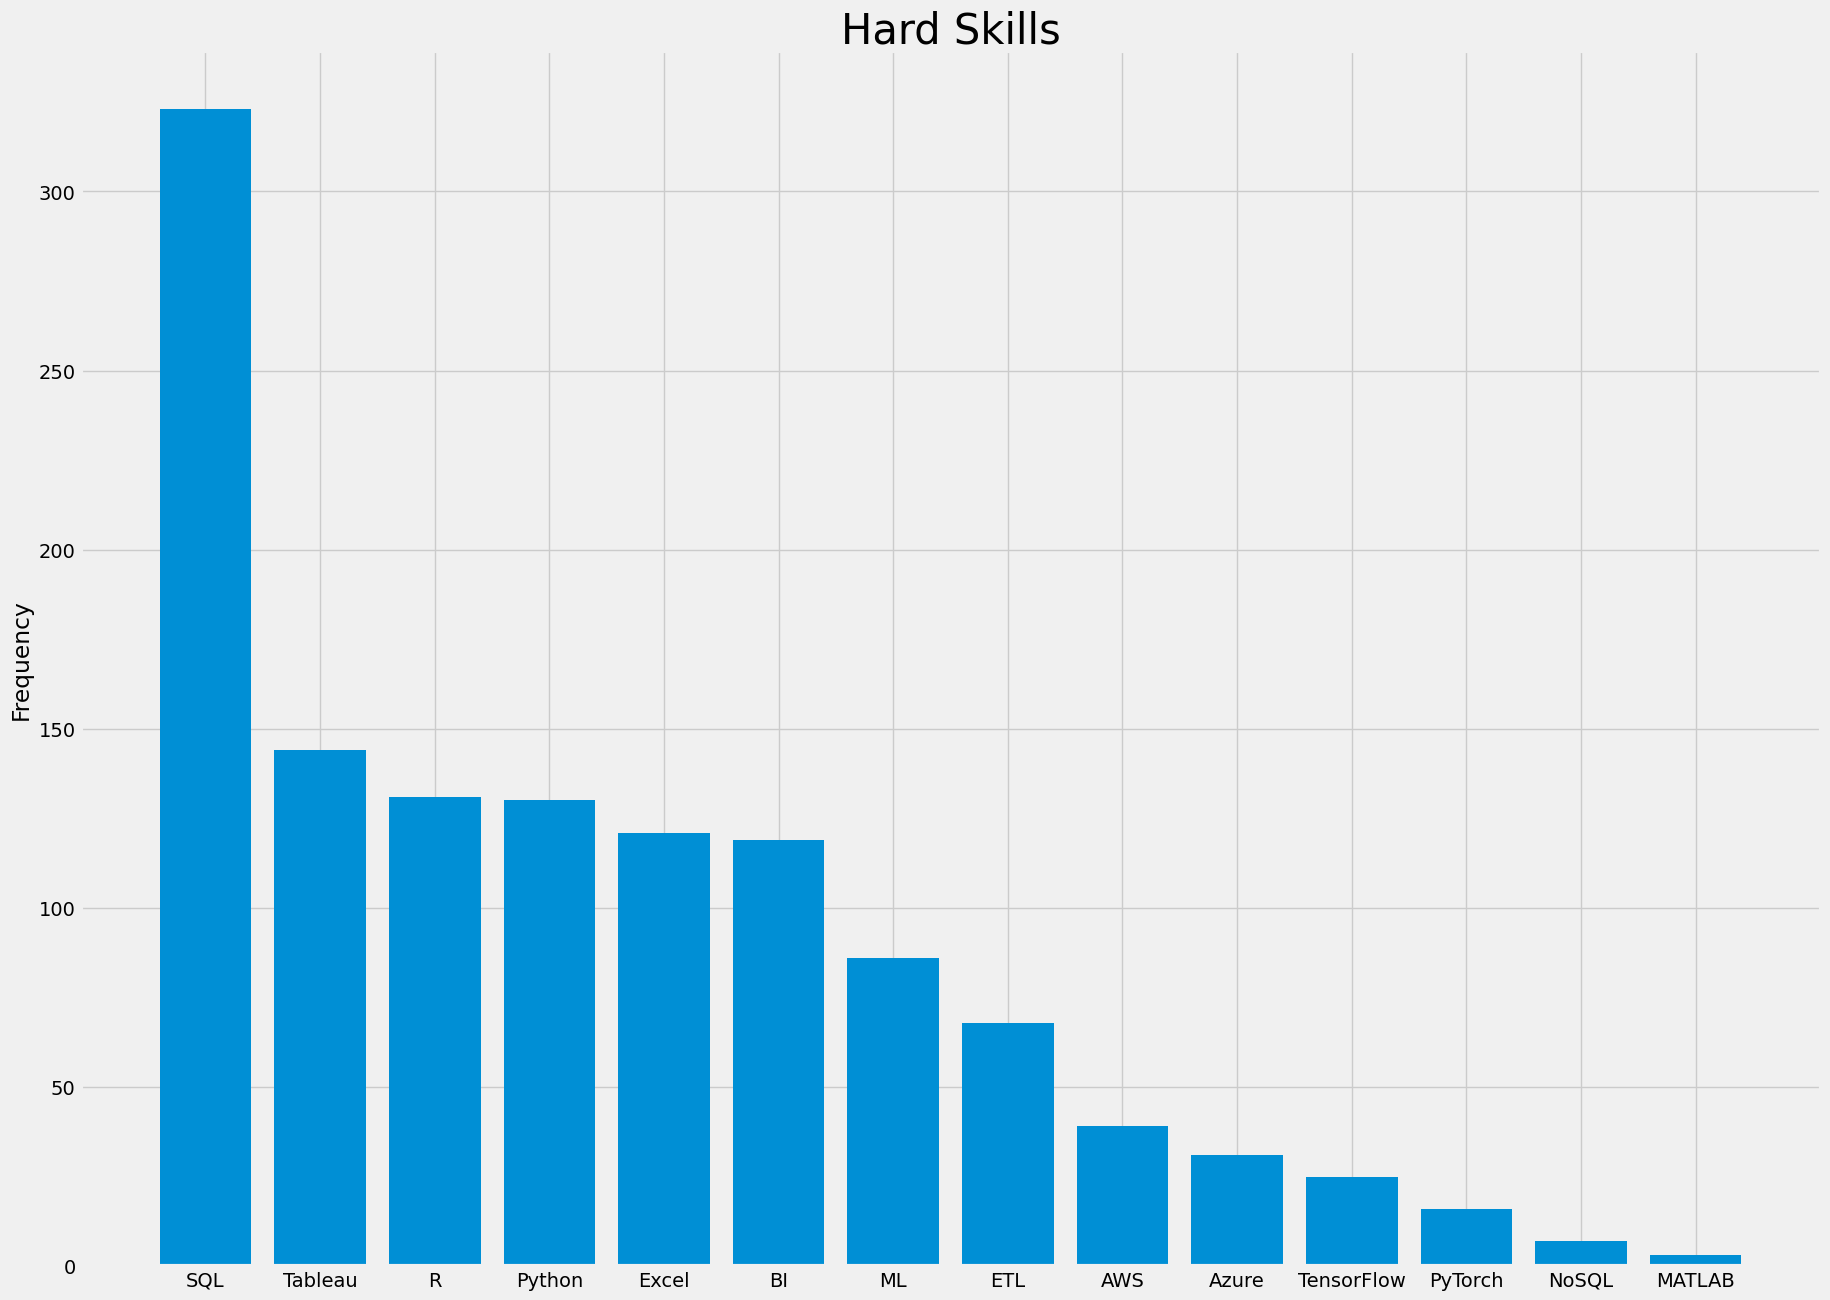

In [50]:
skill_freq = {}
for row in df['hardskills']:
    for skill in row.split():
        skill_freq[skill] = skill_freq.get(skill, 0) + 1

# Sort the dictionary by frequency in descending order
sorted_skill_freq = dict(sorted(skill_freq.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(20,15))
plt.bar(np.arange(len(sorted_skill_freq)), sorted_skill_freq.values())
plt.xticks(np.arange(len(sorted_skill_freq)), sorted_skill_freq.keys(), rotation='horizontal')
plt.title("Hard Skills", fontsize=30)
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/hardskill.png')

In [51]:
#SOFT SKILLS IN A NEW COLUMN

def search_words(text, words):
    # Split the text into words
    text_words = text.split()
    # Search for the specified words in the text
    found_words = [word for word in words if word in text_words]
    # Return the found words as a string
    return ' '.join(found_words)

# Define the words to search for
search_words_list = ['communication','colaboration','critical','thinking', 'curiosity','creativity','solving','mining','modeling','Analisys',
                     'communication;','colaboration;','critical;','thinking;', 'curiosity;','creativity;','solving;','mining;','modeling;','Analisys;',
                     'communication,','colaboration,','critical,','thinking,', 'curiosity,','creativity,','solving,','mining,','modeling,','Analisys,']

# Apply the search_words function to the text column and save the results in a new column
df['softskills'] = df['description'].apply(lambda x: search_words(x, search_words_list))
df['softskills'] = df['softskills'].str.replace(',', '').str.replace(';', '')

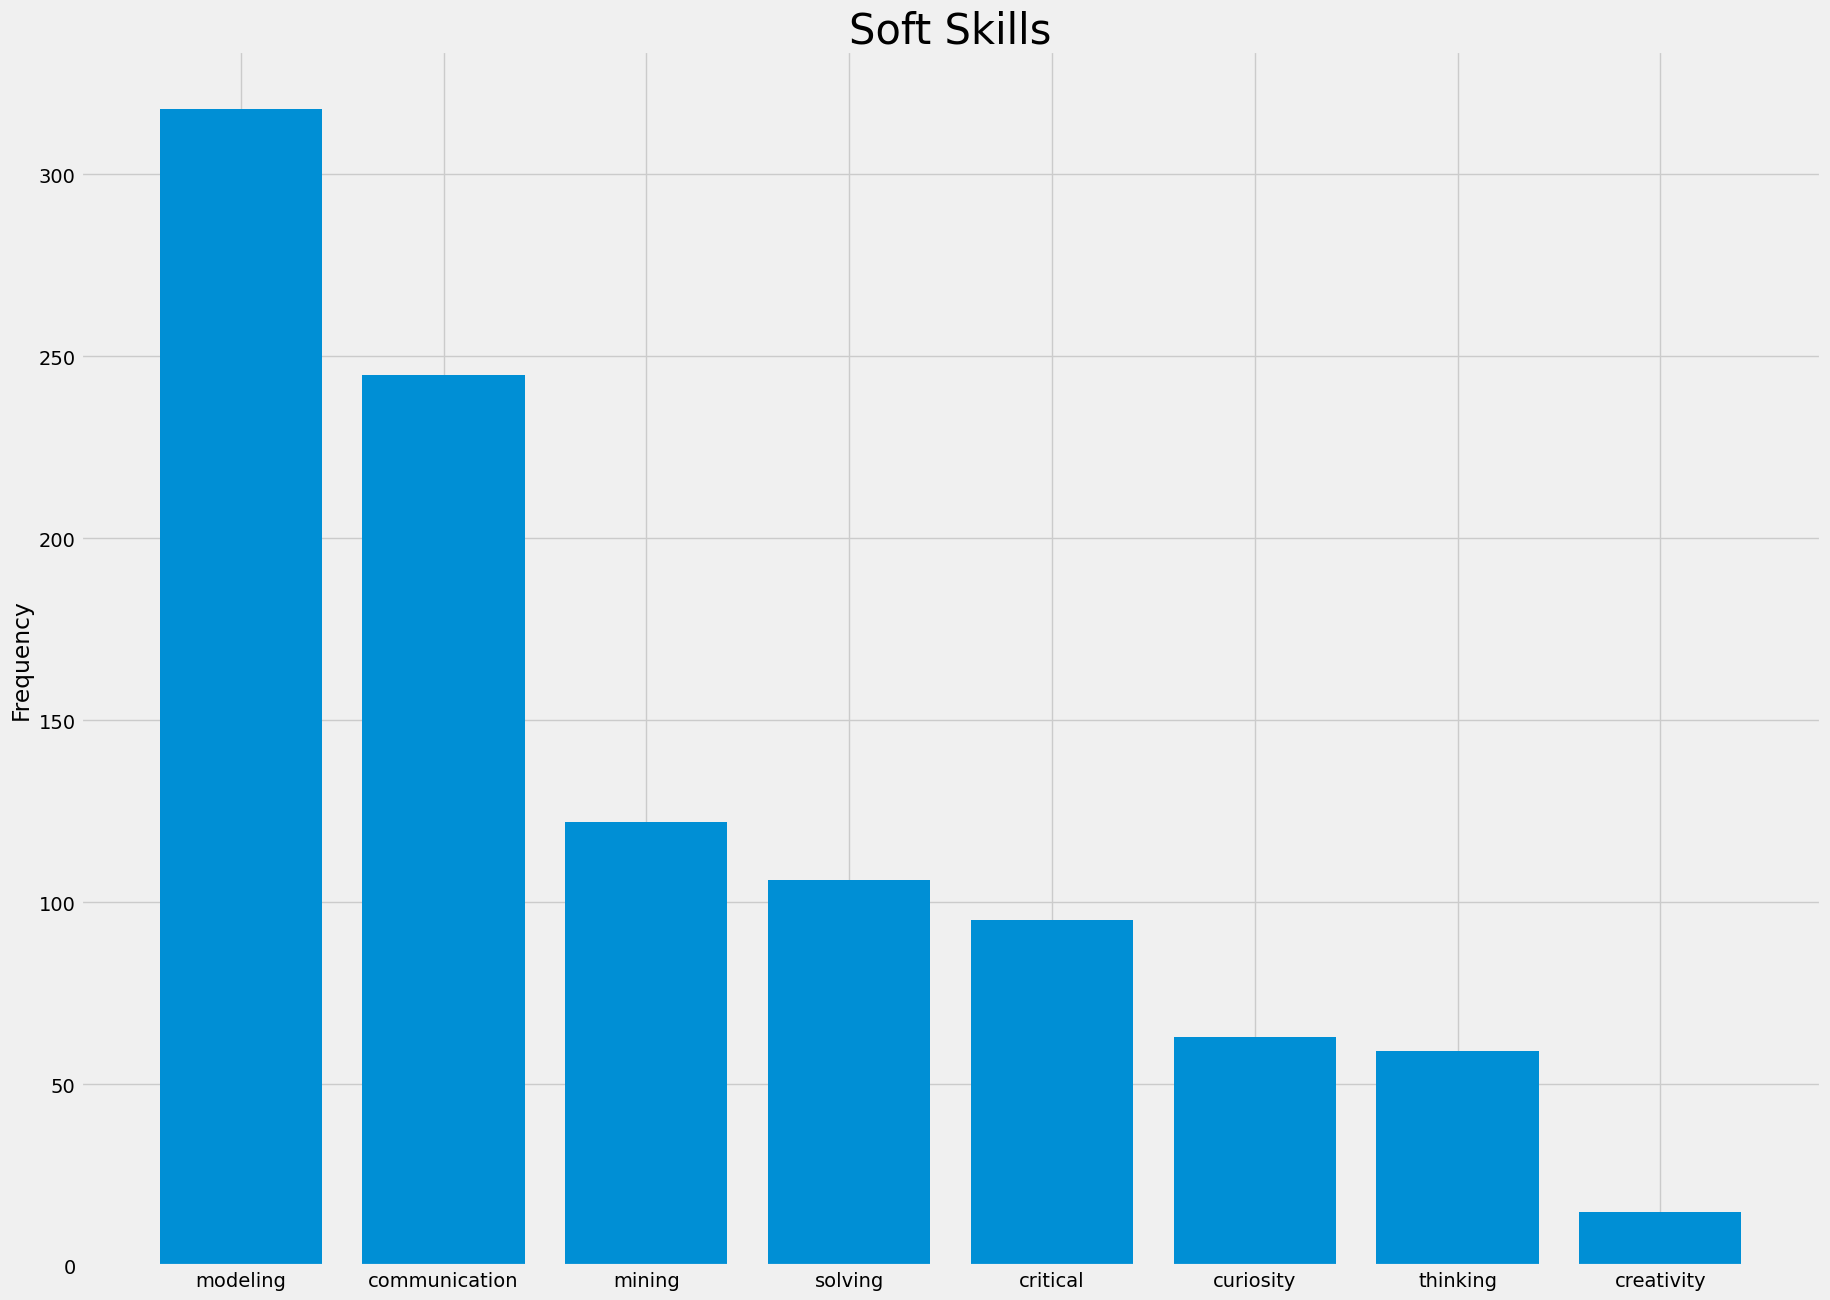

In [52]:
skill_freq = {}
for row in df['softskills']:
    for skill in row.split():
        skill_freq[skill] = skill_freq.get(skill, 0) + 1

# Sort the dictionary by frequency in descending order
sorted_skill_freq = dict(sorted(skill_freq.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(20,15))
plt.bar(np.arange(len(sorted_skill_freq)), sorted_skill_freq.values())
plt.xticks(np.arange(len(sorted_skill_freq)), sorted_skill_freq.keys(), rotation='horizontal')
plt.title("Soft Skills", fontsize=30)
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/softskill.png')

In [53]:
#SALARY IN A NEW COLUMN
import re

pattern = r'\$[\d,.]+'

# Apply the search_numbers function to the text column and save the results in a new column
df['salaries'] = df['description'].apply(lambda x: re.findall(pattern, x))
df['salaries'] = df['salaries'].apply(lambda x: [] if x is None else x)
df['salaries'] = df['salaries'].apply(lambda x: [int(s.strip().replace(',', '').replace('$', '').replace('.', '')) for s in x])

In [54]:
df['total_salary'] = df['salaries'].apply(lambda x: np.round((np.mean(x))))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.



In [55]:
df['final_salary'] = df['total_salary'].apply(lambda x: 60000.0 if x<60000 else (300000.0 if x>300000 else x)) 

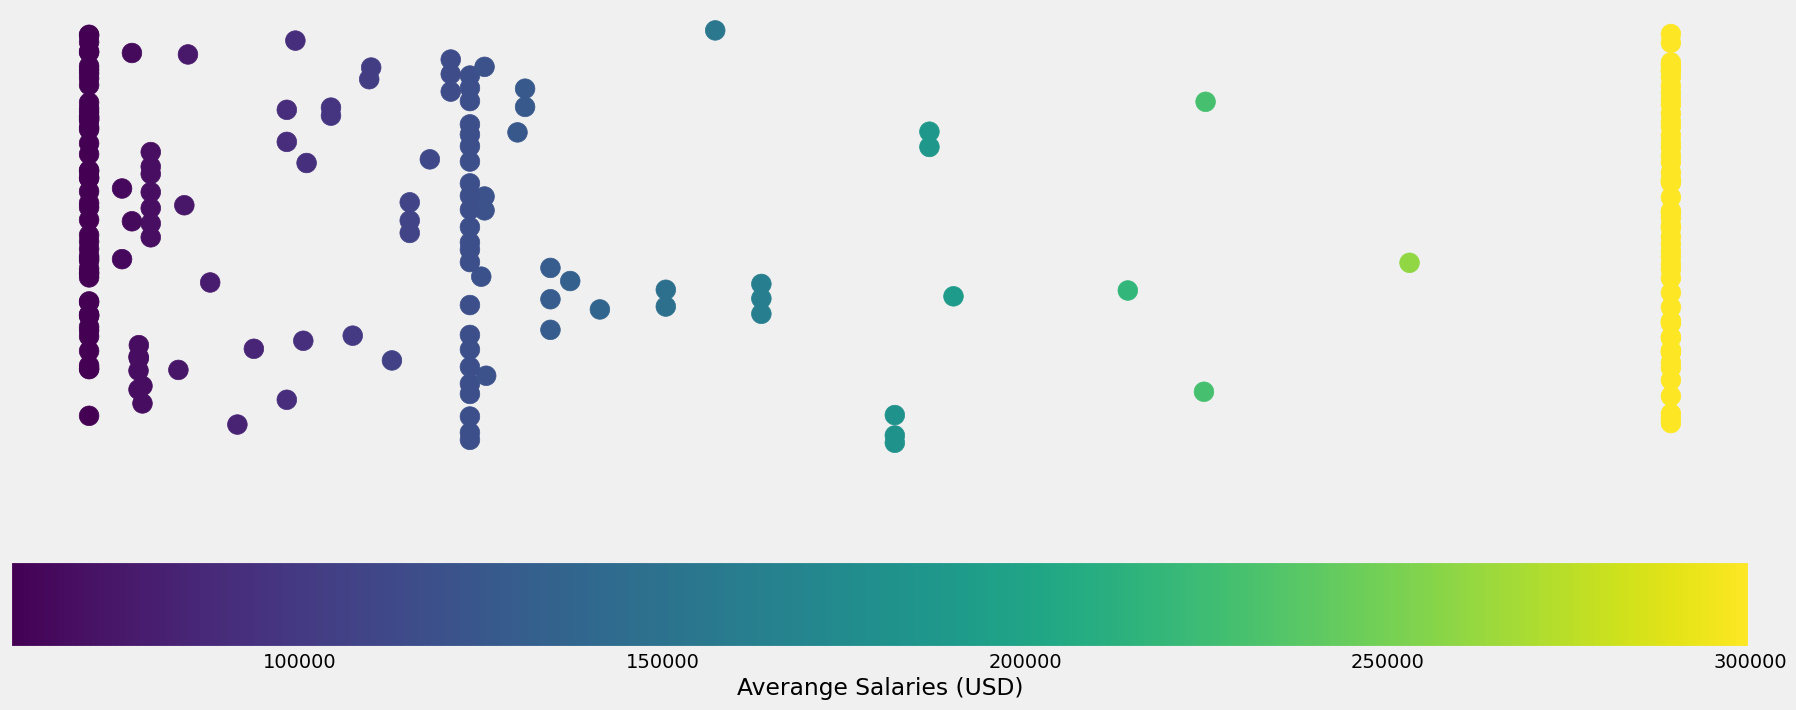

In [56]:
plt.figure(figsize=(20,8))

plt.scatter(y=df.index, x=df['final_salary'], c=df['final_salary'],s=200)
plt.axis("off")
plt.colorbar( orientation='horizontal',label='Averange Salaries (USD)')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/AvgSalaries.png')

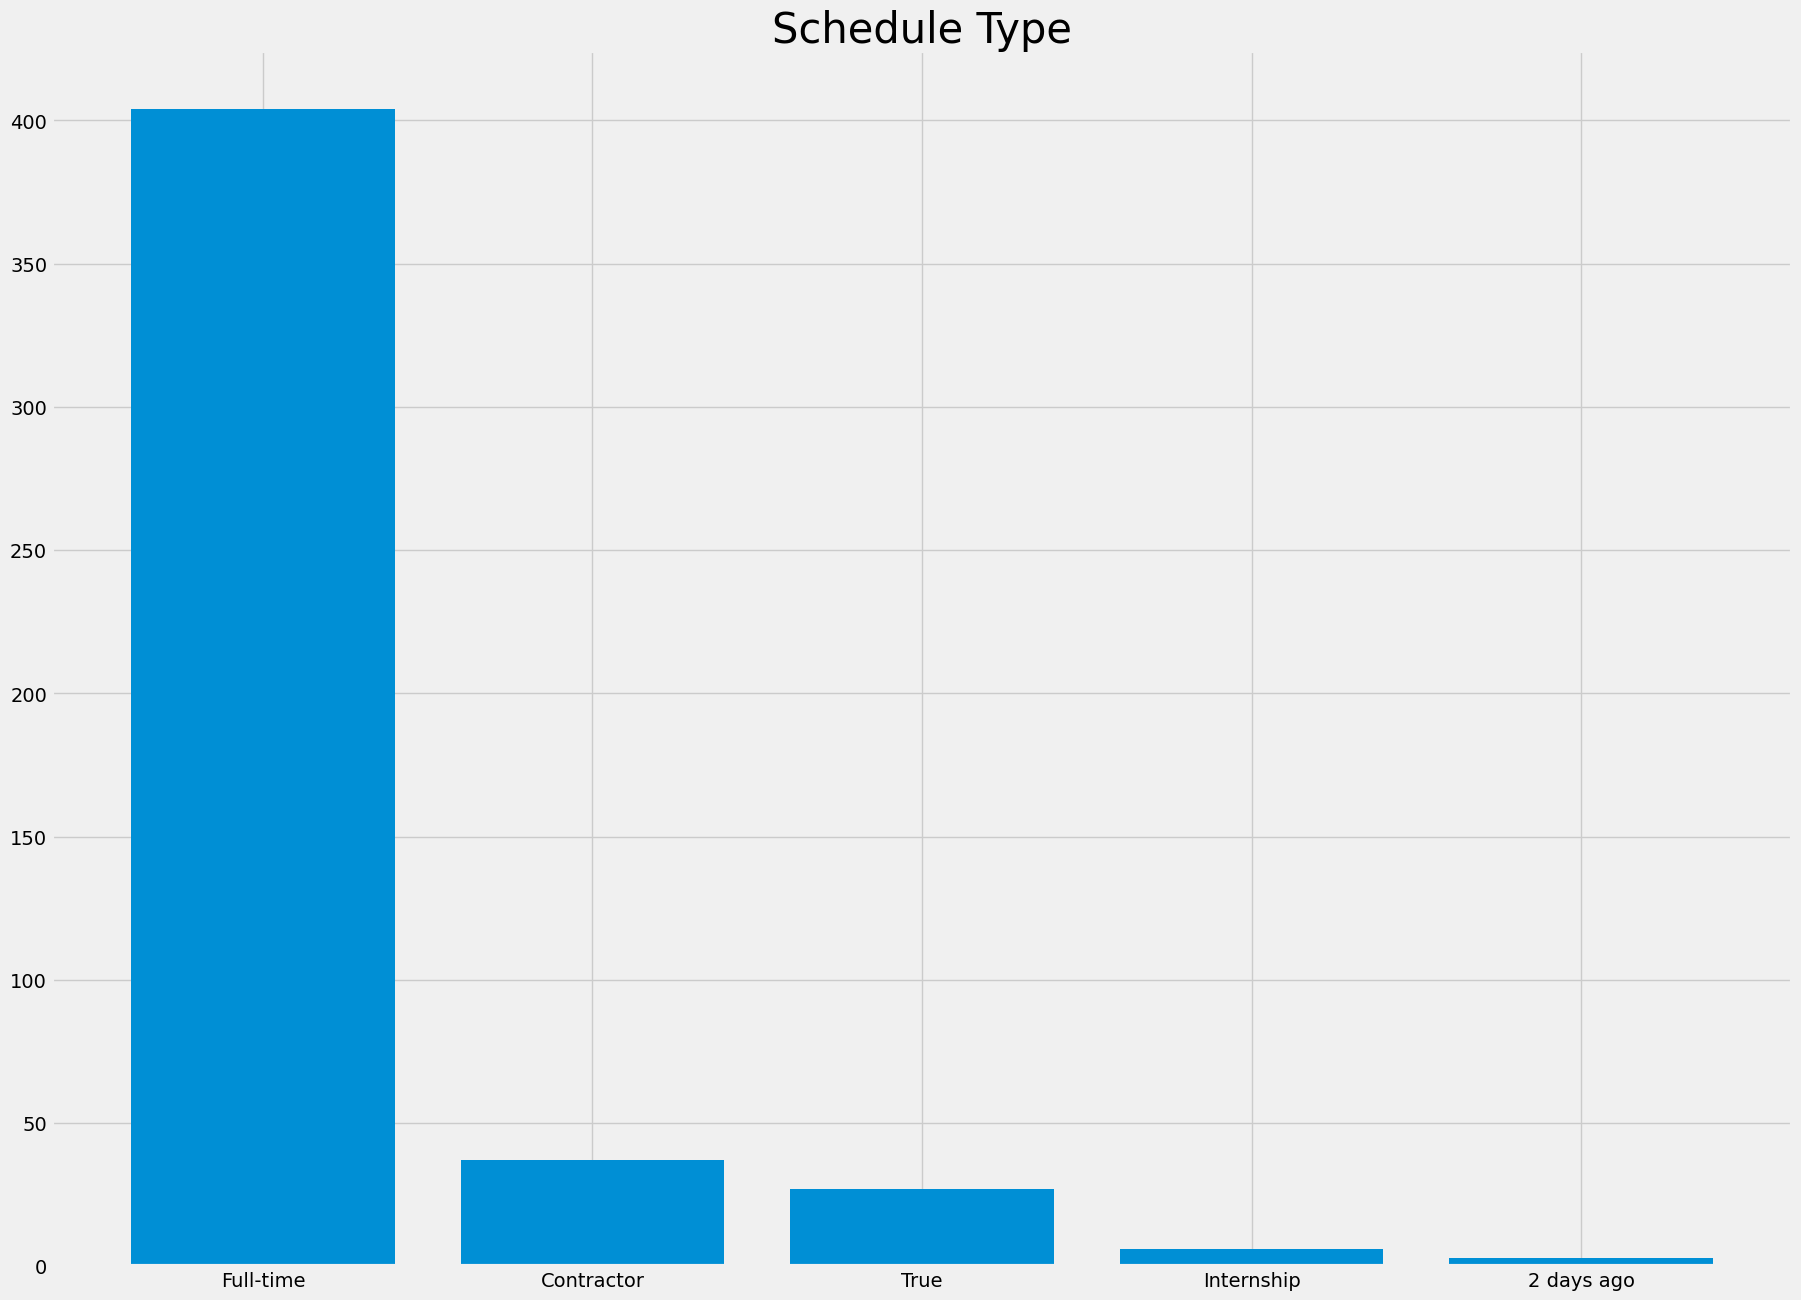

In [57]:
work = df.groupby(['schedule_type'])['title'].count().sort_values(ascending=False).nlargest(5)
plt.figure(figsize=(20,15))
plt.bar(x=work.index, height=work.values)
plt.title("Schedule Type", fontsize=30)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Charts Jobs/schedule.png')

In [58]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/2023/finalJobs.csv',index=False )

# **DAILY SUMMARY**

In [37]:
#Sunburst chart of the companies that offer the job

name = jobs_df.groupby(['company_name'])['company_name'].count()
px.sunburst(name, path=[name.index], values=name.values)

In [38]:
toolss = pd.DataFrame(tools)

(0.0, 8.0)

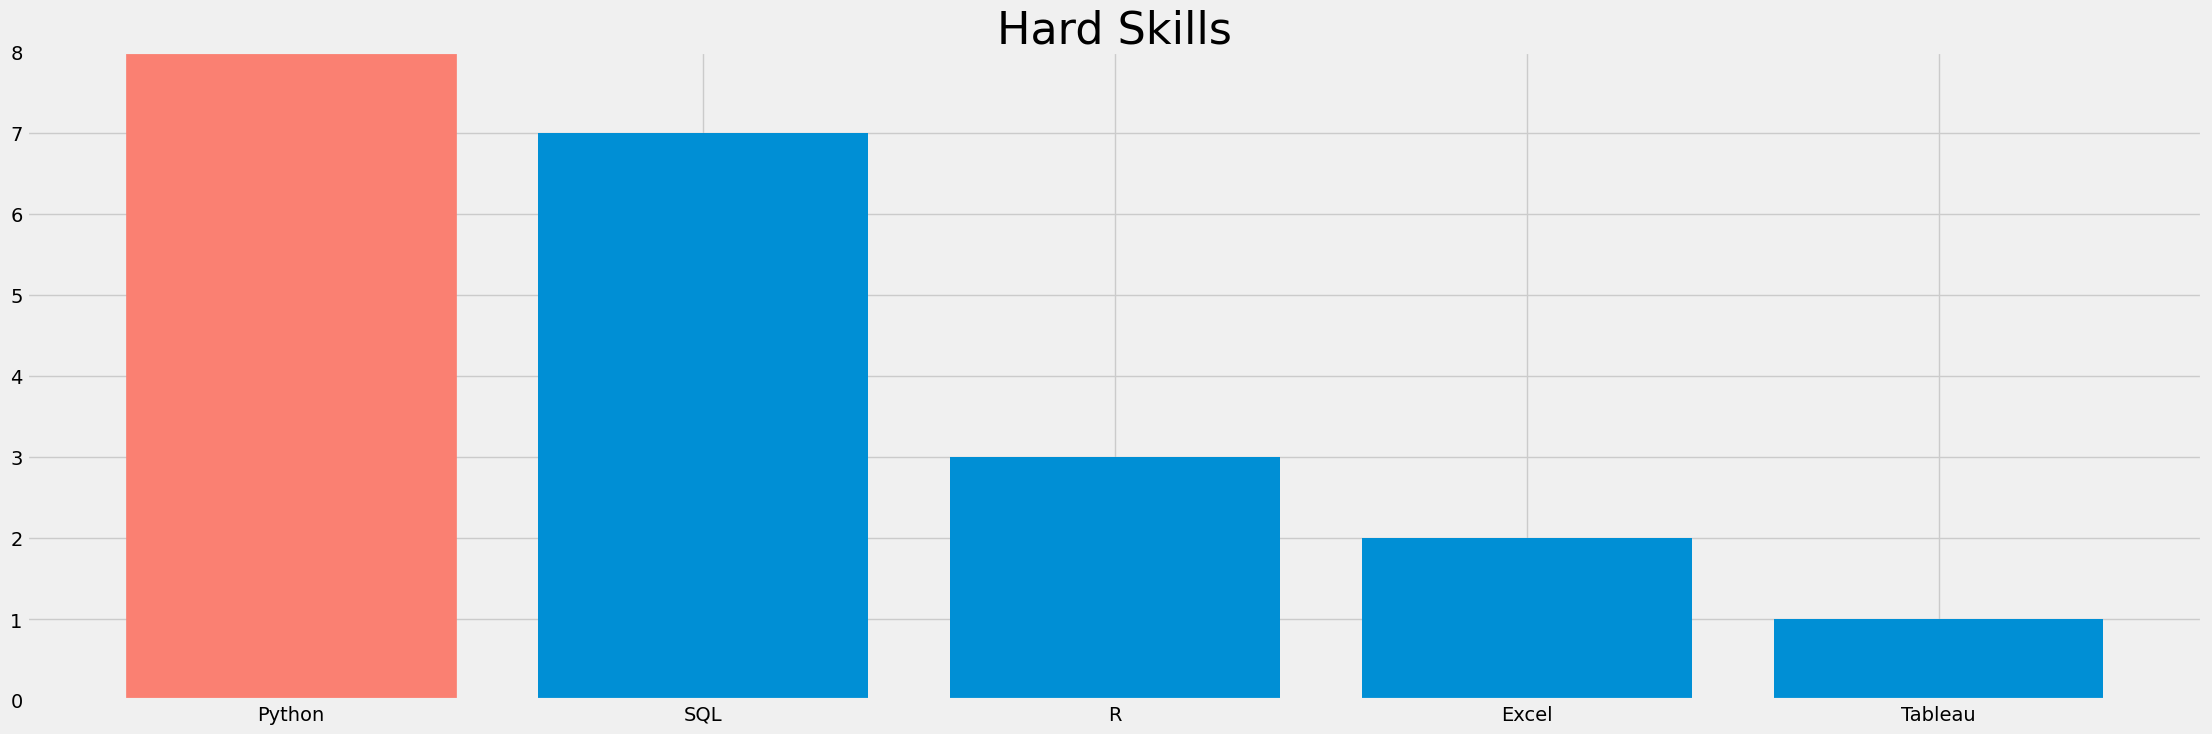

In [39]:
# Bar chart of the hard skills needed to execute the job
t = toolss.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(25,8))
fig = plt.bar(x=t.index, height=t.values)
fig[0].set_color('salmon')
plt.title("Hard Skills", fontsize=32)
plt.ylim(0,8)


(0.0, 11.0)

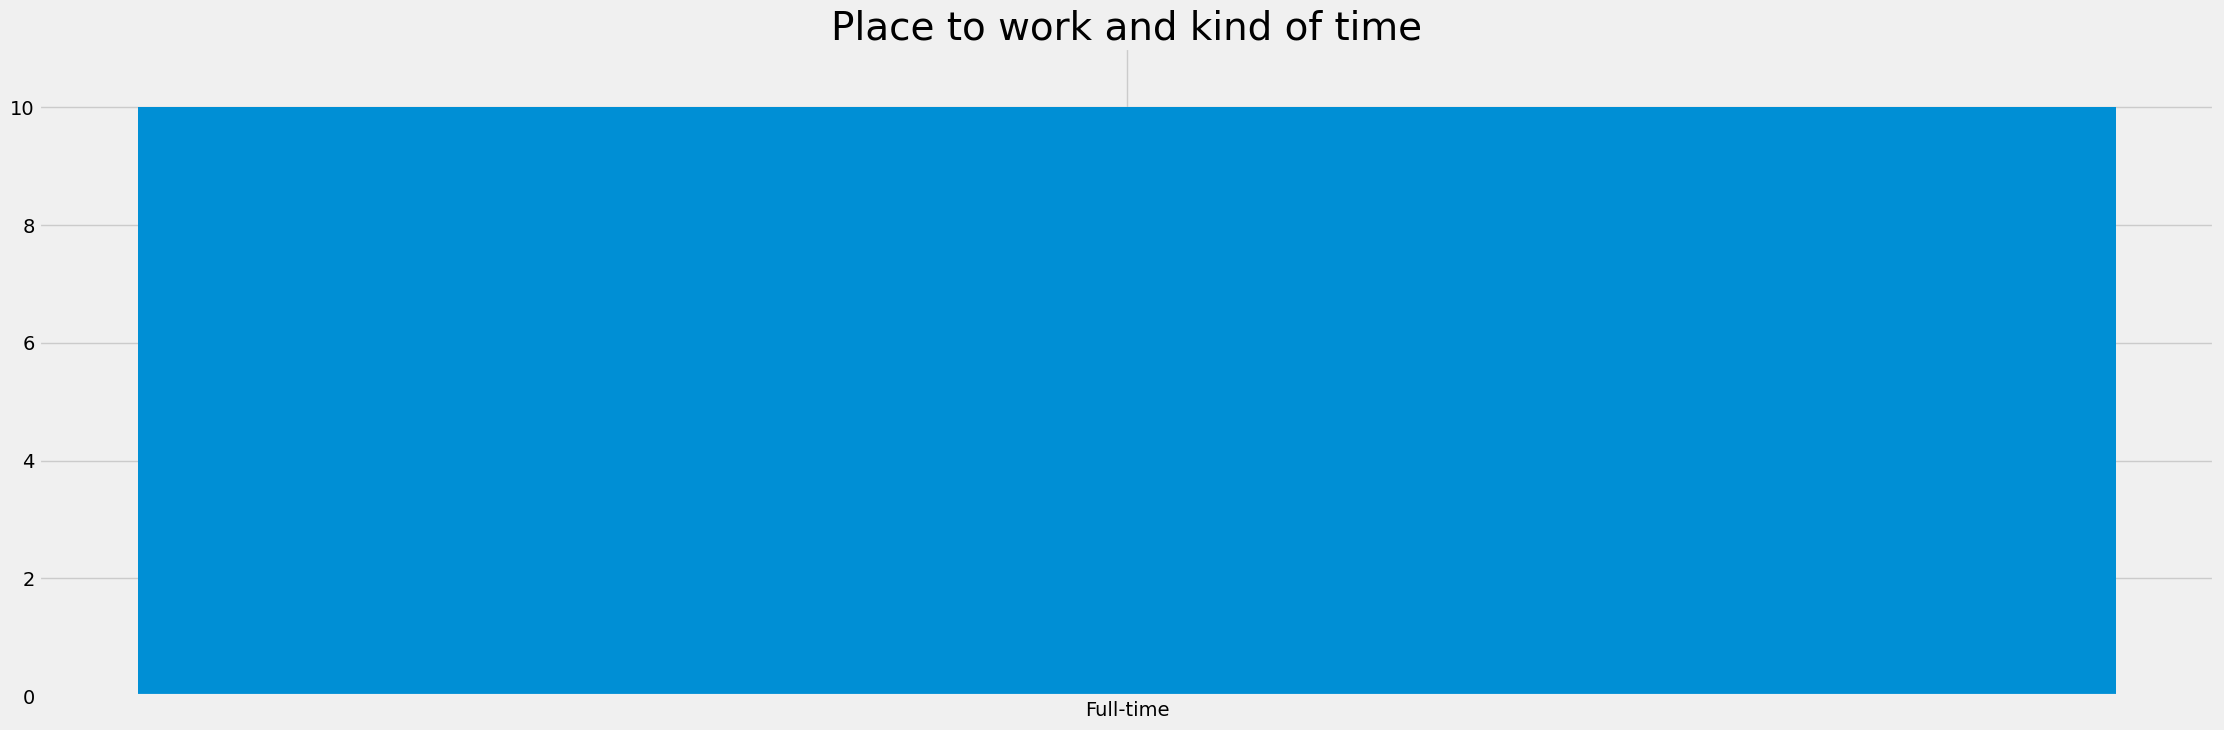

In [40]:
#Bar chart of the places and time to do the job

ti = pd.DataFrame(time)
tim =ti.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(25,8))
plt.bar(x=tim.index, height= tim.values)
plt.title("Place to work and kind of time", fontsize=28)
plt.ylim(0,11)


Text(0.5, 0, 'Posted at')

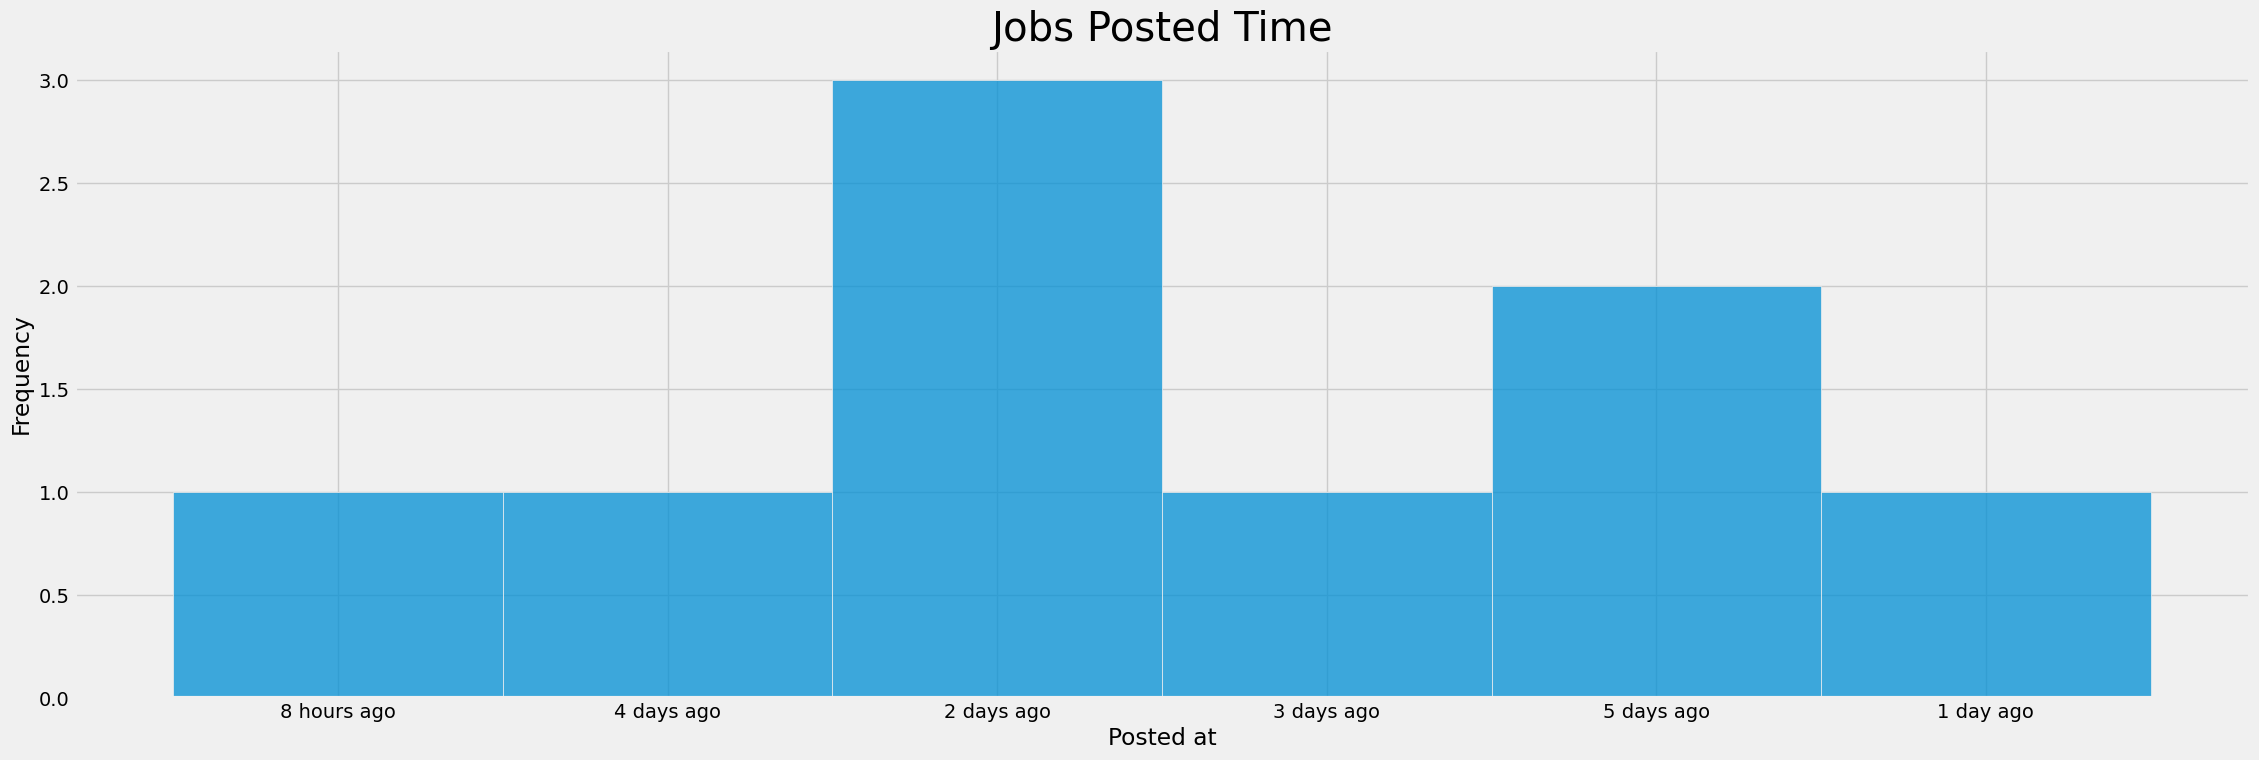

In [41]:
plt.figure(figsize=(25,8))
sns.histplot(jobs_df['posted_at'], bins=15)
plt.title("Jobs Posted Time", fontsize=29)
plt.ylabel("Frequency")
plt.xlabel("Posted at")

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

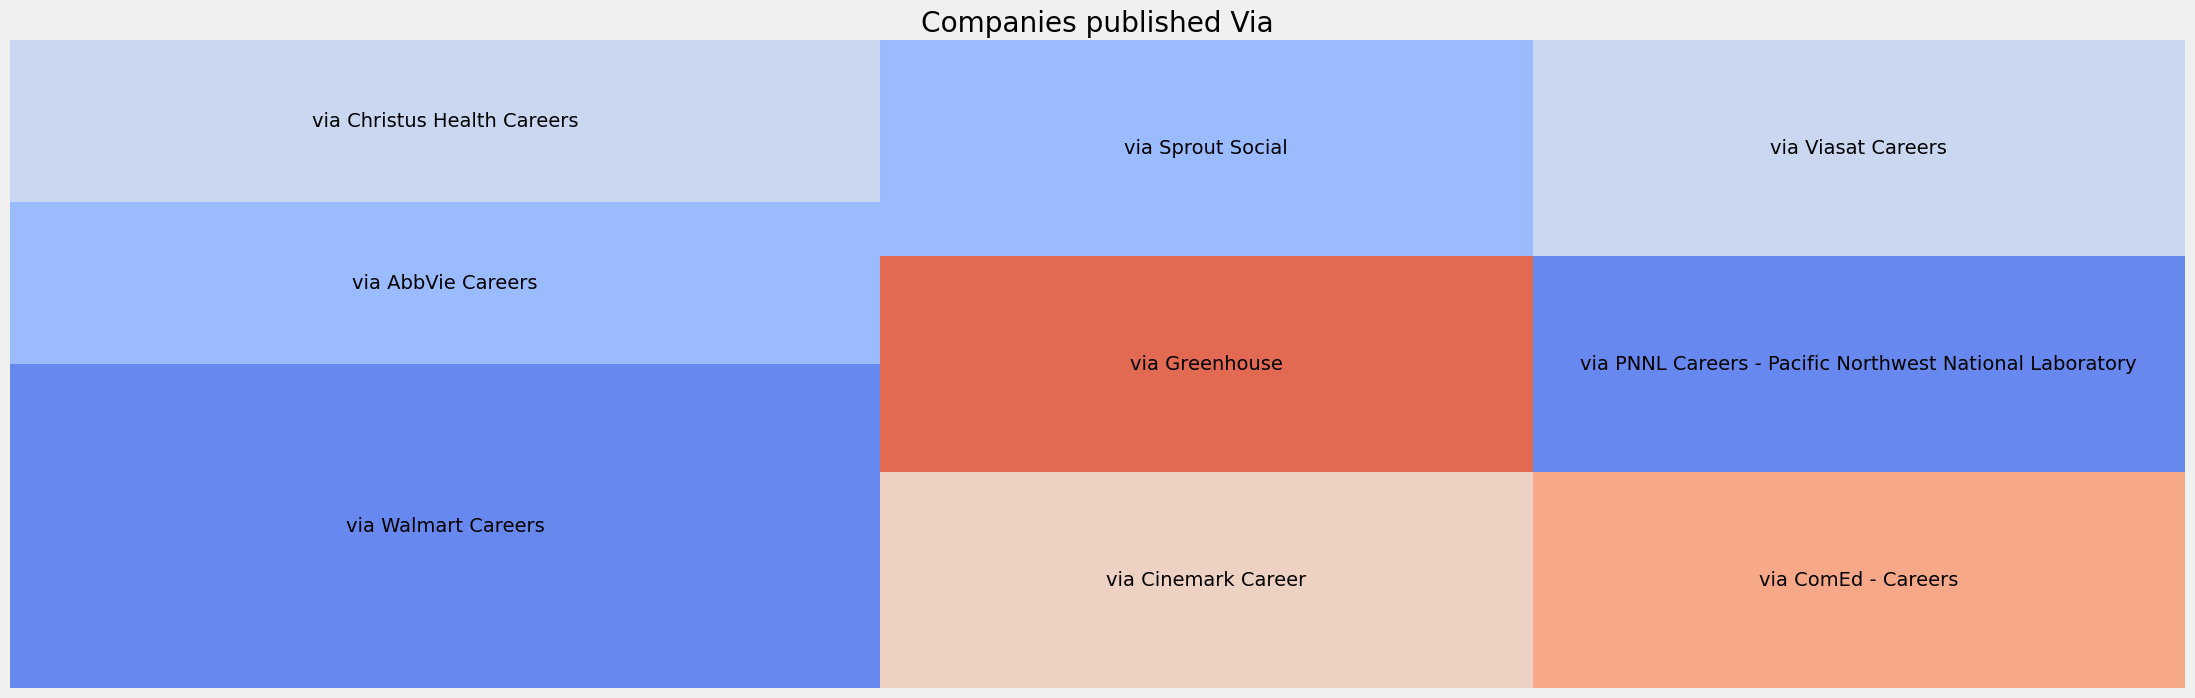

In [42]:
#Tree-map chart than where the companies published the vacancies

via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(25,8))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("coolwarm"))
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)